<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [0]:
import numpy as np
np.random.random(2)

array([0.39439432, 0.9302473 ])

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [0]:
np.random.seed(42)

### 1. Градиентный спуск: повторение

Рассмотрим функцию от двух переменных:

In [0]:
def f(x):
    """
    :param x: np.array(np.float) of dim 2
    :return: np.float
    """
    return np.sum(np.sin(x)**2, axis=0)

In [0]:
x = np.pi, 0
round(f(x), 3)

0.0

Обратите внимание, что $x$ - numpy-array размерности 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинному обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $x_1$ и $x_2$ такие, что при них значение $f(x_1,x_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**. 

Реализуем функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [0]:
def grad_f(x):
    """
    Gradient f, f is defined above.
    :param x: np.array(np.float) of dim 2
    :return: np.array(np.float) of dim 2
    """
    return 2 * np.sin(x) * np.cos(x)

In [0]:
x = np.array([np.pi, 0])
print('2*x = ', 2*x)
print('grad_f(x) = ', np.round(np.sin(2*x), 3))

2*x =  [6.28318531 0.        ]
grad_f(x) =  [-0.  0.]


In [0]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Gradient descent implementation to find a minimum of a function f of 2 variables
        :param f: scalar fct of 2 variables
        :param grad_f: gradient of f (vector of dimention 2)
        :param lr: learning rate of the algorithm
        :param num_iter: number of gradient descent steps
        :return: np.array of pairs (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)
    
    # Save the values of the argument vector and the fct f evaluated at it
    # during the gradient descent into variable history
    history = []
    
    # cycle iteration -- gradient descent step
    curr_x = x0.copy()
    for _ in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        curr_x -= lr * grad_f(curr_x)

    return np.vstack(history)

In [0]:
steps = grad_descent_2d(f, grad_f, lr=0.4, num_iter=20, x0=[5,5])

In [0]:
steps.shape
# num_iter=20
# np.hstack((curr_x, f(curr_x))) is a vector of shape (3,)

(20, 3)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $x_1, x_2, f(x_1, x_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму.

(Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_x_1, cur\_x_2, f(cur\_x_1, cur\_x_2)$ в `steps` в процессе спуска)

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точек минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

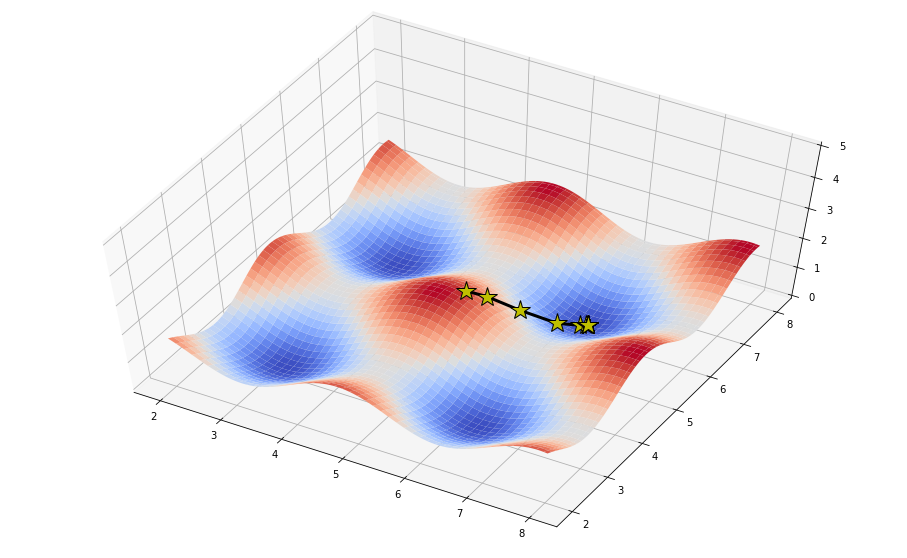

In [0]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(2, 8, 100), np.linspace(2, 8, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, f([X, Y]), cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

#### Задание 1.
Запустите Вашу функцию grad_descent c параметрами lr=0.3, num_iter=20 и начальными приближениями  cur_x1, cur_x2 = 1.5, -1.


In [0]:
steps=grad_descent_2d(f, grad_f, lr=0.3, num_iter=20, x0=[1.5, -1])
#YOUR_CODE
np.sum(steps[-1]) * 10**6


5.8474610183441325

### 2. Linear Regression

В данном пункте мы реализуем метод градиентного спуска для задачи регрессии


$$Y = XW + B + \varepsilon$$

Обратите внимание, что $Y$ - матрица размера $[n\_samples, n\_targets]$, т.е. для каждого объекта мы будем предсказывать не 1 число, а $n\_targets$ чисел. Такая модель будет полезна в будущем, когда вы столкнетесь с полносвязным слоем в нейронных сетях. Размерности остальных матриц в формуле согласованы с $Y$! 

*Напоминание*

Для отыскания значения параметров мы будем минимизировать *MSE*

$Q(X, Y, W, B) = \frac{1}{n}\|Y - (XW + B)\|_F^2 = \frac{1}{n}\ \mathrm{tr} \left[(Y - XW - B) (Y - XW - B)^{\top}\right]$

где $n$ - количество элементов выборки, $\| \cdot \|_F$ — Фробениусова норма матрицы, $\mathrm{tr}$ — след матрицы, $\top$ — оператор транспонирования.

В градиентном спуске на следующем шаге значения параметров получаются из значений на текущем шаге смещением в сторону антиградиента функции потерь:

$$W_{(k+1)} = W_{(k)} - \eta_k \nabla Q(W_{(k)}),$$
где $\eta_t$ — длина шага (learning rate).

Градиент в случае MSE выглядит следующим образом:

$$
\begin{aligned}
\nabla_{W} Q &= \frac{2}{n}X^T(\widehat{Y} - Y)\\
\nabla_{B} Q &= \frac{2}{n}(\widehat{Y} - Y)
\end{aligned}
$$

где $\widehat{Y} = XW + B$  


!!У нас есть несколько переменных, чтобы получить MSE нужно посчитать сумму квадратов ошибок и поделить на $n$, а не на $nk$, где $n$ - размер выборки, а $k$ - размерность таргета, для MAE так же!!


In [0]:
a = [1, 1, 1]
b = [0, 3, 4]
c =np.array([a,b])

In [0]:
np.sum(c, axis = 0)

array([1, 4, 5])

In [0]:
a = np.zeros((10, 3))
b = np.zeros((10, 3))
b[0, :] = 3
b[1, :] = 4
b

array([[3., 3., 3.],
       [4., 4., 4.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [0]:
l_p_metric = 2

print(np.linalg.norm(a))

norms = np.linalg.norm(b-a, ord=l_p_metric, axis=0) ** l_p_metric
print(norms)
print(np.sum(norms))
print(np.sum(norms) / a.shape[0])

0.0
[25. 25. 25.]
75.0
7.5


In [0]:
np.random.normal(loc=0, scale=0.01, size=(2, 3))

array([[ 0.00496714, -0.00138264,  0.00647689],
       [ 0.0152303 , -0.00234153, -0.00234137]])

In [0]:
class LinearRegression:
    def __init__(self, l_p_metric=2, seed=42):
        """
        :param l_p_metric: Задаёт метрику для оптимизации.
        Значение 1 соответсвует MAE, 2 — MSE.
        :param seed: radom_seed для случайной инициализации весов
        """
        # Use np.linalg.norm
        self.metric = lambda preds, y: \
        np.sum(
            np.linalg.norm(x=(y-preds), ord=l_p_metric, axis=0) ** l_p_metric
            ) / y.shape[0]
        self.seed = seed

        self.W = None
        self.b = None
        
    def init_weights(self, input_size, output_size):
        """
        Инициализирует параметры модели
        :param W: - матрица размерности (input_size, output_size)
        инициализируется рандомными числами из
        нормального распределения со средним 0 и стандартным отклонением 0.01
        :param b: - вектор размерности (1, output_size)
        инициализируется нулями
        """
        np.random.seed(self.seed)
        self.W = np.random.normal(loc=0, scale=0.01,
                                  size=(input_size, output_size))
        self.b = np.zeros(shape=(1, output_size))


    def fit(self, X, y, num_epochs=1000, lr=0.001):
        """
        Обучение модели линейной регрессии методом градиентного спуска
        :param X: размерности (num_samples, input_shape)
        :param y: размерности (num_samples, output_shape)
        :param num_epochs: количество итераций градиентного спуска
        :param lr: шаг градиентного спуска
        :return metrics: вектор значений метрики на каждом шаге градиентного
        спуска. Метрика контролируется параметром l_p_metric в конструкторе
        """
        self.init_weights(X.shape[1], y.shape[1])
        metrics = []
        n = X.shape[0]

        for _ in range(num_epochs):
            preds = self.predict(X)
            # сделайте вычисления градиентов без циклов,
            # используя только numpy
            W_grad = 2 / n * X.T @ (preds - y)
            b_grad = 2 / n * np.sum(preds - y, axis=0)
            self.W -= lr * W_grad
            self.b -= lr * b_grad
            metrics.append(self.metric(preds, y))
        
        return metrics


    def predict(self, X):
        """
        Думаю, тут все понятно. Сделайте свои предсказания :)
        """
        return X @ self.W + self.b

#### Задание 2.

1. Зафиксируйте `random.seed == 42`
2. Сгенерируйте данные с помощью `make_regression` с параметами `n_targets=3, n_features=2, noise=10, random_state=42`. С помощью `train_test_split` разделите данные на обучение и тест 
3. Обучите модель линейной регрессии с параметрами по умолчанию.

In [0]:
X, Y = datasets.make_regression(n_targets=3, n_features=2, noise=10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [0]:
model = LinearRegression()
mse = model.fit(X_train, Y_train)

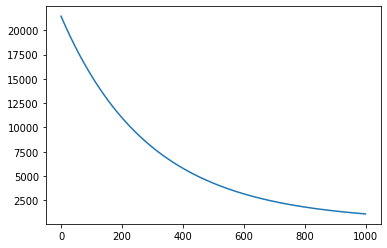

In [0]:
# Постройте график для MSE
plt.plot(np.arange(len(mse)), mse)

####  Задание 3.

1. Обучите модель линейной регрессии на тех же данных. В этот раз считайте MAE

In [0]:
model = LinearRegression(l_p_metric=1)
mae = model.fit(X_train, Y_train)

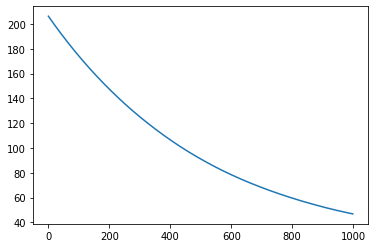

In [0]:
# Постройте график для MSE
plt.plot(np.arange(len(mae)), mae)

### Логистическая регрессия

Теперь будем решать задачу классификации при помощи логистической регрессии

In [0]:
X, y = datasets.make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

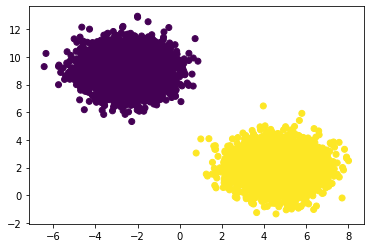

In [0]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0])
plt.show()

Небольшое напоминание по логистической регрессии:

Сигмоида
$$ \sigma(h) = \frac{1}{1 + exp(-h)} $$

Вероятность принадлежности к классу

$$ P(y = 1 | x, w) = \sigma(x, w) $$

Логистическая функция потерь

$$ L(y, p) = - \frac{1}{m}\sum_{1}^{m}(y_i log(p_i) + (1 - y_i) log(1 - p_i)) $$

## Логистическая регрессия
Для вывода логической регрессии удобнее рассматривать бинарную классификацию, где метки классов лежат во множестве $\{0, 1\}$. 

Задачу обучения логистической регрессии можно записать следующим образом:

$$ L(y, p)  \to \min_w$$

Обучение в данном случае сводится к нахождению параметров модели $w$, которое производится с помощью метода градиентного спуска (Gradient Descent, GD). 

Градиентный шаг будет заключаться в обновлении вектора весов по следующей формуле:

$$w := w - \eta \frac{X^T (p - y)}{n}$$

где $\eta > 0$ — размер шага (learning rate).


#### Задание 4

1. Реализуйте все методы класса `LogisticRegressionGD`
2. Создайте модель и обучите ее с параметрами по умолчанию на train данных
3. по полученным `accs` и  `losses` посчитайте среднее.
4. Посчитайте accuracy на test данных. `threshold=0.5`.

In [0]:
a = np.zeros((10, 3))
b = np.zeros((10, 3))
b[0, :] = 3
b[1, :] = 4
b

array([[3., 3., 3.],
       [4., 4., 4.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [0]:
np.hstack((np.ones((b.shape[0], 1)), b))

array([[1., 3., 3., 3.],
       [1., 4., 4., 4.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [0]:
def get_acc(p, y, threshold=0.5):
    """
    This method computes accuracy:
    acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
    """
    positive = (p > threshold).astype(int)
    return np.sum(positive == y) / len(y)


p = np.array([0.1, 0.1, 0.1, 0.6, 0.6, 0.6])
y = np.array([0, 0, 1, 1, 1, 0])
get_acc(p, y)

0.6666666666666666

In [0]:
def get_loss(p, y):
    """
    Данный метод вычисляет логистическую функцию потерь
    @param p: Вероятности принадлежности к классу 1
    @param y: Истинные метки
    """
    return - np.sum(y * np.log(p) + (1-y) * np.log(1-p)) / len(y)


# p = np.array([0.1, 0.1, 0.1, 0.6, 0.6, 0.6])
p = np.array([0, 0, 1, 1, 1, 0])
y = np.array([0, 0, 1, 1, 1, 0])

# необходимо для стабильности вычислений под логарифмом
p = np.clip(p, 1e-10, 1 - 1e-10)
print('p = ', p)
print('Loss: ', np.round(get_loss(p, y), 3))

p =  [1.e-10 1.e-10 1.e+00 1.e+00 1.e+00 1.e-10]
Loss:  0.0


### LogisticRegressionGD

In [0]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class LogisticRegressionGD:
    '''
    A simple logistic regression for binary classification with gradient descent
    '''
    
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        """
        Данный метод должен возвращать следующую матрицу:
        X_ext = [1, X], где 1 - единичный вектор
        это необходимо для того, чтобы было удобнее производить
        вычисления, т.е., вместо того, чтобы считать X@W + b
        можно было считать X_ext@W_ext 
        """
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    def init_weights(self, input_size, output_size):
        """
        Инициализирует параметры модели
        W - матрица размерности (input_size, output_size)
        инициализируется рандомными числами из
        нормального распределения со средним 0 и стандартным отклонением 0.01
        """
        np.random.seed(42)
        self.W = np.random.normal(loc=0, scale=0.01,
                                  size=(input_size, output_size))
        
    def get_loss(self, p, y):
        """
        Данный метод вычисляет логистическую функцию потерь
        @param p: Вероятности принадлежности к классу 1
        @param y: Истинные метки
        """
        return - np.sum(y * np.log(p) + (1-y) * np.log(1-p)) / len(y)
    
    def get_prob(self, X):
        """
        Данный метод вычисляет P(y=1|X,W)
        Возможно, будет удобнее реализовать дополнительный
        метод для вычисления сигмоиды
        """
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        return sigmoid(logit(X, self.W))
    
    def get_acc(self, p, y, threshold=0.5):
        """
        This method computes accuracy:
        acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
        """
        positive = (p > threshold).astype(int)
        return np.mean(positive == y)

    def fit(self, X, y, num_epochs=100, lr=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        accs = []
        losses = []
        for _ in range(num_epochs):
            p = self.get_prob(X)

            W_grad = X.T @ (p-y) / len(y)
            self.W -= lr * W_grad
            
            # необходимо для стабильности вычислений под логарифмом
            p = np.clip(p, 1e-10, 1 - 1e-10)
            
            log_loss = self.get_loss(p, y)
            losses.append(log_loss)
            acc = self.get_acc(p, y)
            accs.append(acc)
        
        return accs, losses

In [0]:
model = LogisticRegressionGD()
accs, losses = model.fit(X_train, y_train)

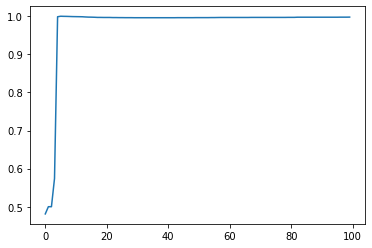

In [0]:
# accuracy
plt.plot(np.arange(len(accs)), accs)

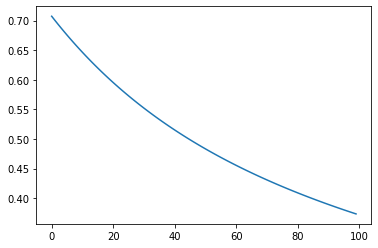

In [0]:
#  loss
plt.plot(np.arange(len(losses)), losses)

### Logistic regresion with SGD

Сложность вычисления в случае с GD $O(kn)$, где $k$ - размер вектора признаков, $n$ - размер всей выборки.
В случае, когда выборка очень большая, это решение становится непрактичным

GD заменяют на SGD - *Стохастический градиентный спуск*. Он отличается от обычного заменой градиента на несмещённую оценку по одному или нескольким объектам. В этом случае сложность становится  $O(kl)$ , где  $l$  — количество объектов, по которым оценивается градиент,  $l << n$.

#### Задание 5

1. Реализуйте все методы класса `LogisticRegressionSGD`
2. Создайте модель и обучите ее с параметрами по умолчанию на train данных
3. по полученным `accs` и  `losses` посчитайте среднее. 
4. Посчитайте accuracy на test данных. `threshold=0.5`. 

In [0]:
# playing with generators
a = ((x**2, x**3) for x in range(10))
print(a)

for i in a:
    print(i)

<generator object <genexpr> at 0x7f62c5b3efc0>
(0, 0)
(1, 1)
(4, 8)
(9, 27)
(16, 64)
(25, 125)
(36, 216)
(49, 343)
(64, 512)
(81, 729)


In [0]:
a = np.zeros((10, 3))
b = np.zeros((10, 3))
b[0, :] = 3
b[1, :] = 4

X = np.hstack([np.arange(b.shape[0])[:, np.newaxis], b])
print(X, '\n')
y = np.random.randint(low=0, high=1, size=b.shape[0])
print(y, '\n')

batch_size=2
num_samples = b.shape[0]
num_batches = num_samples // batch_size
print('num_batches: ', num_batches, '\n')

def simple_generator(X, y, batch_size=2):
    num_samples = X.shape[0]
    num_batches = num_samples // batch_size

    for i in range(num_batches):
        # Необходимо отдать batch_size обьектов и соответствующие им target
        yield (X[i*batch_size:(i+1)*batch_size, :], y[i*batch_size:(i+1)*batch_size])

[[0. 3. 3. 3.]
 [1. 4. 4. 4.]
 [2. 0. 0. 0.]
 [3. 0. 0. 0.]
 [4. 0. 0. 0.]
 [5. 0. 0. 0.]
 [6. 0. 0. 0.]
 [7. 0. 0. 0.]
 [8. 0. 0. 0.]
 [9. 0. 0. 0.]] 

[0 0 0 0 0 0 0 0 0 0] 

num_batches:  5 



In [0]:
gen = simple_generator(X=X, y=y, batch_size=2)
i = 0
for X_, y_ in gen:
    print('batch ', i, ':\n', X_, y_, '\n')
    i += 1

batch  0 :
 [[0. 3. 3. 3.]
 [1. 4. 4. 4.]] [0 0] 

batch  1 :
 [[2. 0. 0. 0.]
 [3. 0. 0. 0.]] [0 0] 

batch  2 :
 [[4. 0. 0. 0.]
 [5. 0. 0. 0.]] [0 0] 

batch  3 :
 [[6. 0. 0. 0.]
 [7. 0. 0. 0.]] [0 0] 

batch  4 :
 [[8. 0. 0. 0.]
 [9. 0. 0. 0.]] [0 0] 



In [0]:
def logit(x, w):
    return np.dot(x, w)


def sigmoid(h):
    return 1. / (1 + np.exp(-h))


def batch_generator(X, y, batch_size=100):
    """
    Необходимо написать свой генератор батчей.
    Если вы не знаете, что такое генератор, то, возможно,
    вам поможет
    https://habr.com/ru/post/132554/
    В данном генераторе не надо перемешивать данные
    """
    num_samples = X.shape[0]
    # Заметьте, что в данном случае, если num_samples не делится на batch_size,
    # то последние элементы никогда не попадут в обучение
    # в данном случае нас это не волнует
    num_batches = num_samples // batch_size
    for i in range(num_batches):
        # Необходимо отдать batch_size обьектов и соответствующие им target
        yield (X[i*batch_size:(i+1)*batch_size, :], y[i*batch_size:(i+1)*batch_size])


class LogisticRegressionSGD:
    def __init__(self):
        pass
    
    def __extend_X(self, X):
        """
        Данный метод должен возвращать следующую матрицу:
        X_ext = [1, X], где 1 - единичный вектор
        это необходимо для того, чтобы было удобнее производить
        вычисления, т.е., вместо того, чтобы считать X@W + b
        можно было считать X_ext@W_ext
        """
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def init_weights(self, input_size, output_size):
        """
        Инициализирует параметры модели
        W - матрица размерности (input_size, output_size)
        инициализируется рандомными числами из
        нормального распределения со средним 0 и стандартным отклонением 0.01
        """
        np.random.seed(42)
        self.W = np.random.normal(loc=0, scale=0.01,
                                  size=(input_size, output_size))
        
    def get_loss(self, p, y):
        """
        Данный метод вычисляет логистическую функцию потерь
        @param p: Вероятности принадлежности к классу 1
        @param y: Истинные метки
        """
        return - (np.sum(y * np.log(p) + (1-y) * np.log(1-p))) / len(y)
    
    def get_prob(self, X):
        """
        Данный метод вычисляет P(y=1|X,W)
        Возможно, будет удобнее реализовать дополнительный
        метод для вычисления сигмоиды
        """
        if X.shape[1] != self.W.shape[0]:
            X = self.__extend_X(X)
        return sigmoid(logit(X, self.W))
    
    def get_acc(self, p, y, threshold=0.5):
        """
        Данный метод вычисляет accuracy:
        acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
        """
        positive = (p > threshold).astype(int)
        return np.mean(positive == y)

    def fit(self, X, y, num_epochs=10, lr=0.001):
        
        X = self.__extend_X(X)
        self.init_weights(X.shape[1], y.shape[1])
        
        accs = []
        losses = []
        for _ in range(num_epochs):
            gen = batch_generator(X, y)
            for X_, y_ in gen:
                p = self.get_prob(X_)
                
                W_grad = X_.T @ (p-y_) / len(y_)
                self.W -= lr * W_grad

                # необходимо для стабильности вычислений под логарифмом
                p = np.clip(p, 1e-10, 1 - 1e-10)

                log_loss = self.get_loss(p, y_)
                losses.append(log_loss)
                acc = self.get_acc(p, y_)
                accs.append(acc)
        
        return accs, losses

In [0]:
model = LogisticRegressionSGD()
accs, losses = model.fit(X_train, y_train)

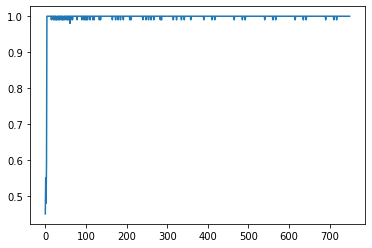

In [0]:
# accuracy
plt.plot(np.arange(len(accs)), accs)

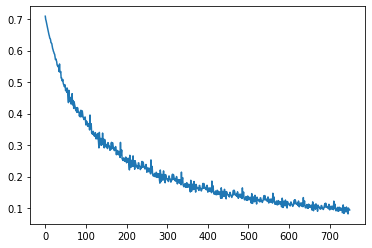

In [0]:
# losses
plt.plot(np.arange(len(losses)), losses)

В данном случае модель тренируется значительно дольше, чем c *Gradient Decent*. Попробуйте объяснить, почему так происходит

In [0]:
import numpy as np

a = np.zeros((10, 3))
b = np.zeros((10, 3))
b[0, :] = 3
b[1, :] = 4

X = np.hstack([np.arange(b.shape[0])[:, np.newaxis], b])
print(X, '\n')
y = np.random.randint(low=0, high=1, size=b.shape[0])
print(y, '\n')

np.sum(X)

[[0. 3. 3. 3.]
 [1. 4. 4. 4.]
 [2. 0. 0. 0.]
 [3. 0. 0. 0.]
 [4. 0. 0. 0.]
 [5. 0. 0. 0.]
 [6. 0. 0. 0.]
 [7. 0. 0. 0.]
 [8. 0. 0. 0.]
 [9. 0. 0. 0.]] 

[0 0 0 0 0 0 0 0 0 0] 



66.0